In [86]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [14]:
data_set = load_breast_cancer()
x, y = data_set.data, data_set.target

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=50)

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [59]:
data_set.target_names

array(['malignant', 'benign'], dtype='<U9')

Trying to creat a datframe containing the whole set

In [60]:
data_frame = pd.DataFrame(data=data_set.data, columns=data_set.feature_names)
data_frame["benign"] = data_set.target
data_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: >

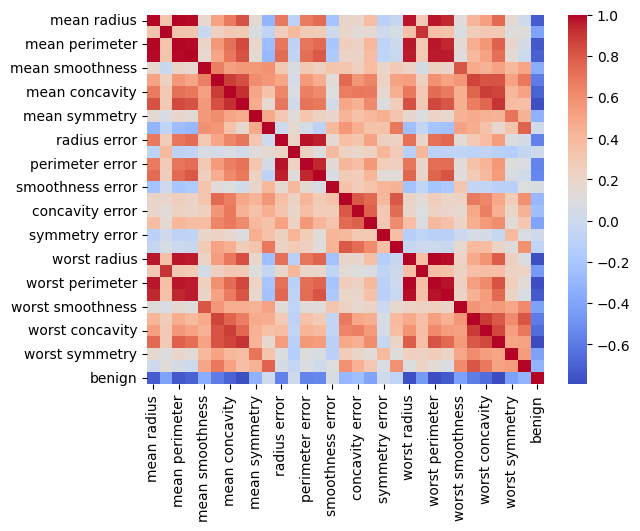

In [62]:
correlation = data_frame.corr()
sns.heatmap(correlation, cmap="coolwarm")

Most correlated features

In [73]:
target_correlation = data_frame.corr()["benign"]
target_correlation.apply(abs).sort_values(ascending=False)

benign                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [77]:
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [78]:
rfc.score(x_test, y_test)

0.965034965034965

Most important features according to the algorithm

In [85]:
feature_names = data_set.feature_names
feature_importance = rfc.feature_importances_
for key, value in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"feature: \033[92m{key}\033[0m | relevance: \033[91m{value}\033[0m")

feature: worst perimeter | relevance: 0.15142526603114978
feature: worst area | relevance: 0.13675133171692316
feature: worst radius | relevance: 0.12738276020352327
feature: mean concave points | relevance: 0.06658646831518027
feature: mean area | relevance: 0.06625947432386305
feature: worst concave points | relevance: 0.06365668818157633
feature: mean perimeter | relevance: 0.04596810919943429
feature: worst concavity | relevance: 0.045799467494893824
feature: area error | relevance: 0.04278346926706121
feature: mean concavity | relevance: 0.036711962248399066
feature: mean radius | relevance: 0.034789813012812795
feature: worst compactness | relevance: 0.026026214206393675
feature: perimeter error | relevance: 0.0189418624806953
feature: worst texture | relevance: 0.01651435551753928
feature: worst smoothness | relevance: 0.01613400686184192
feature: mean texture | relevance: 0.015028874426116074
feature: mean compactness | relevance: 0.01494320148533748
feature: radius error | rel